<a href="https://colab.research.google.com/github/Safin-wolf/Fruit-Quality-Detection/blob/main/Fruits_Project(12).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the required modules
import os
import random
import shutil
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(tf.__version__)

2.14.0


In [ ]:
def make_directory(path):
    if os.path.exists(path):
        return path
    os.mkdir(path)
    return path

# Define the base directory and create necessary subdirectories
base_dir = 'C:\\Users\\Fateh\\Downloads\\Compressed\\dataset'
os.makedirs(base_dir, exist_ok=True)  # Create the base directory if it doesn't exist
fruit_dir = make_directory(os.path.join(base_dir, 'Fruit-Dataset'))
train_dir = make_directory(os.path.join(fruit_dir, 'Train'))
validation_dir = make_directory(os.path.join(fruit_dir, 'Val'))
test_dir = make_directory(os.path.join(fruit_dir, 'Test'))

# Define subdirectories for different classes
train_classes = ['FreshApple', 'FreshBanana', 'FreshOrange', 'RottenApple', 'RottenBanana', 'RottenOrange']

for dir_path in [train_dir, validation_dir, test_dir]:
    for cls in train_classes:
        make_directory(os.path.join(dir_path, cls))

In [ ]:
def split_data(source, training, validation, split_size=0):
    data = os.listdir(source)
    random.shuffle(data)  # Shuffle the data list
    train_size = int(len(data) * split_size)

    for i, filename in enumerate(data):
        filepath = os.path.join(source, filename)
        target_dir = training if i < train_size else validation
        copyfile(filepath, os.path.join(target_dir, filename))

In [ ]:
dataset_train_dir = 'C:\\Users\\Fateh\\Downloads\\Compressed\\dataset\\train'
dataset_test_dir = 'C:\\Users\\Fateh\\Downloads\\Compressed\\dataset\\test'

In [ ]:
# Define subdirectories for different classes
train_classes = ['FreshApple', 'FreshBanana', 'FreshOrange', 'RottenApple', 'RottenBanana', 'RottenOrange']
test_classes = ['FreshApple', 'FreshBanana', 'FreshOrange', 'RottenApple', 'RottenBanana', 'RottenOrange']

print('Training set:')
for cls in train_classes:
    class_dir = os.path.join(dataset_train_dir, cls)
    print(f'{cls} images =', len(os.listdir(class_dir)))

print('\nTest set:')
for cls in test_classes:
    class_dir = os.path.join(dataset_test_dir, cls)
    print(f'{cls} images =', len(os.listdir(class_dir)))

Training set:
FreshApple images = 2201
FreshBanana images = 2154
FreshOrange images = 1787
RottenApple images = 2790
RottenBanana images = 2255
RottenOrange images = 2295

Test set:
FreshApple images = 774
FreshBanana images = 832
FreshOrange images = 924
RottenApple images = 1114
RottenBanana images = 1059
RottenOrange images = 790


In [ ]:
SPLIT_SIZE = 0.75
for cls in train_classes:
    # Define subdirectories for each class in the training and validation directories
    train_sub_dir = os.path.join(train_dir, cls)
    validation_sub_dir = os.path.join(validation_dir, cls)

    # Create the subdirectories if they don't exist
    os.makedirs(train_sub_dir, exist_ok=True)
    os.makedirs(validation_sub_dir, exist_ok=True)

    # Split the data for this class into the subdirectories
    split_data(os.path.join(dataset_train_dir, cls), train_sub_dir, validation_sub_dir, SPLIT_SIZE)

SPLIT_SIZE = 1.0
for cls in test_classes:
    # Define a subdirectory for each class in the test directory
    test_sub_dir = os.path.join(test_dir, cls)

    # Create the subdirectory if it doesn't exist
    os.makedirs(test_sub_dir, exist_ok=True)

    # Move all the data for this class into the subdirectory
    split_data(os.path.join(dataset_test_dir, cls), test_sub_dir, test_sub_dir, SPLIT_SIZE)

base_dir = r'C:\Users\Fateh\Downloads\Compressed\dataset/Fruit-Dataset'
categories = ['Train', 'Val', 'Test']
fruits = ['FreshApple', 'FreshBanana', 'FreshOrange', 'RottenApple', 'RottenBanana', 'RottenOrange']

for category in categories:
    print(f'\n{category} images:')
    for fruit in fruits:
        fruit_dir = os.path.join(base_dir, category, fruit)
        print(f'{fruit} = ', len(os.listdir(fruit_dir)))


Train images:
FreshApple =  1650
FreshBanana =  1615
FreshOrange =  1340
RottenApple =  2092
RottenBanana =  1691
RottenOrange =  1721

Val images:
FreshApple =  551
FreshBanana =  539
FreshOrange =  447
RottenApple =  698
RottenBanana =  564
RottenOrange =  574

Test images:
FreshApple =  774
FreshBanana =  832
FreshOrange =  924
RottenApple =  1114
RottenBanana =  1059
RottenOrange =  790


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2, #0.2, 0.5
    height_shift_range=[0.2, 0.5], #0.2, 0.5
    shear_range=0.2,
    zoom_range=0.2, # 0.2, 0.5, [0.5,1.0]
    rotation_range=90, #20, 40, 60, 90
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect' #nearest, reflect, wrap
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

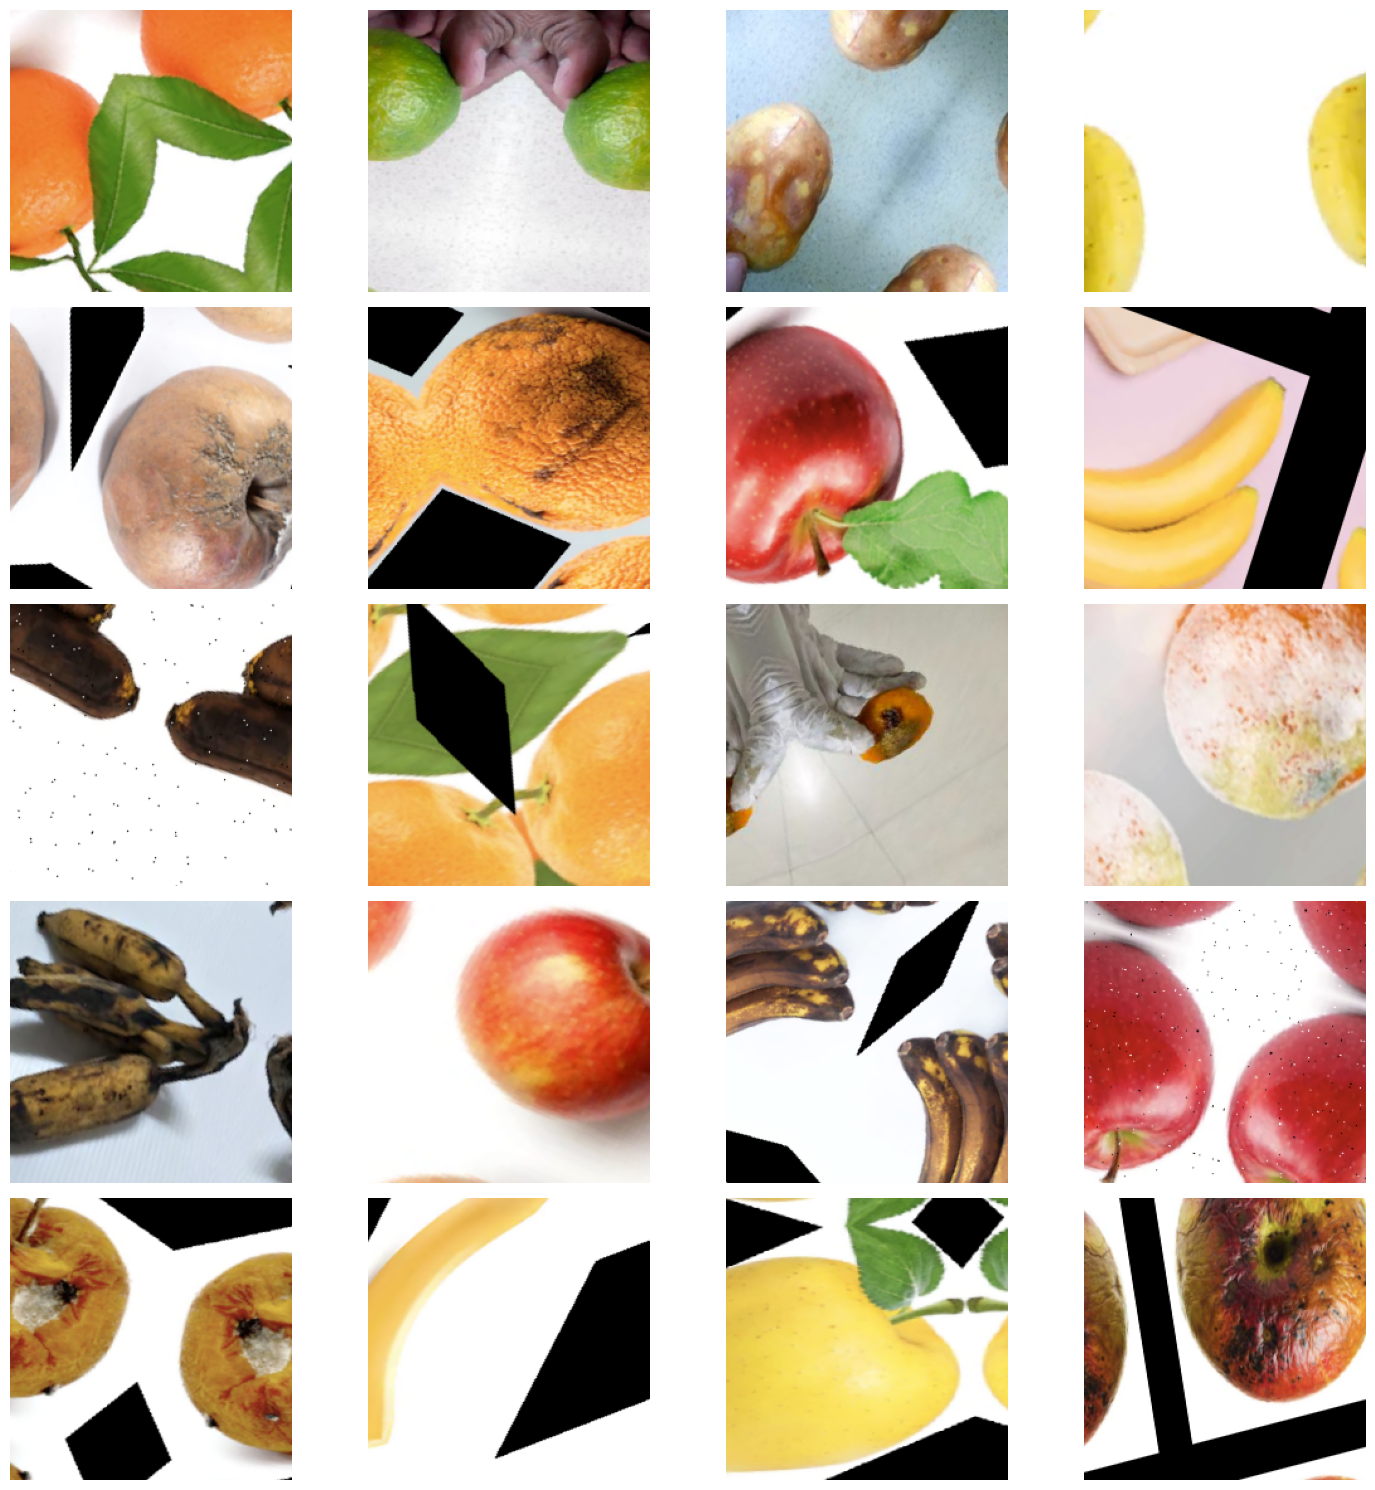

In [ ]:
# Get a list of all images in the directory
all_images = []
for root, dirs, files in os.walk(train_dir):
    for file in files:
        if file.endswith(".png") or file.endswith(".jpg"):
            all_images.append(os.path.join(root, file))

# Select a random sample of images
random_images = random.sample(all_images, 20)

fig, axs = plt.subplots(5, 4, figsize=(15, 15))
axs = axs.ravel()

for i in range(20):
    img_path = random_images[i]

    # Load the image
    img = image.load_img(img_path, target_size=(224, 224))

    # Convert the image to an array
    img_array = image.img_to_array(img)

    # Reshape the array for the ImageDataGenerator
    img_array = img_array.reshape((1,) + img_array.shape)

    # Apply the preprocessing steps
    # Note: flow() returns a generator that yields batches of images
    img_generator = train_datagen.flow(img_array, batch_size=1)

    # Get the first batch of images (in this case, it's just one image)
    preprocessed_img_array = next(img_generator)[0]

    # Convert the array back to an image
    preprocessed_img = image.array_to_img(preprocessed_img_array)

    axs[i].imshow(preprocessed_img)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    color_mode="rgb",
                                                    target_size=(224,224),
                                                    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32,
                                                         color_mode="rgb",
                                                         target_size=(224,224),
                                                         class_mode='categorical')

Found 10109 images belonging to 6 classes.
Found 3373 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > 0.99):
            print("\nReached 99% accuracy. Stop Training")
            self.model.stop_training = True

callbacks = myCallback()

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load pre-trained MobileNet, without its top layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # This layer is often used in this kind of model architecture
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)  # Six classes for fruit quality detection

# Define new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

17225924/17225924 [==============================] - 123s 7us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                            

                                                                 
 conv_dw_8 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
          

In [ ]:
train_len = sum(len(os.listdir(os.path.join(train_dir, foldername))) for foldername in os.listdir(train_dir))
val_len = sum(len(os.listdir(os.path.join(validation_dir, foldername))) for foldername in os.listdir(validation_dir))

print(train_len)
print(val_len)

10109
3373


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=(train_len/32),
    epochs=20,
    verbose=1,
    callbacks=[callbacks, early_stopping],
    validation_data=validation_generator,
    validation_steps=(val_len/32)
)

Epoch 1/20
315/315 [==============================] - 969s 3s/step - loss: 0.3801 - accuracy: 0.8645 - val_loss: 0.1586 - val_accuracy: 0.9419
Epoch 2/20
315/315 [==============================] - 673s 2s/step - loss: 0.1993 - accuracy: 0.9280 - val_loss: 0.1225 - val_accuracy: 0.9561
Epoch 3/20
315/315 [==============================] - 614s 2s/step - loss: 0.1730 - accuracy: 0.9363 - val_loss: 0.1330 - val_accuracy: 0.9496
Epoch 4/20
315/315 [==============================] - 616s 2s/step - loss: 0.1533 - accuracy: 0.9457 - val_loss: 0.1265 - val_accuracy: 0.9517
Epoch 5/20
315/315 [==============================] - 628s 2s/step - loss: 0.1442 - accuracy: 0.9473 - val_loss: 0.1249 - val_accuracy: 0.9505
Epoch 6/20
315/315 [==============================] - 609s 2s/step - loss: 0.1284 - accuracy: 0.9536 - val_loss: 0.1221 - val_accuracy: 0.9570
Epoch 7/20
315/315 [==============================] - 611s 2s/step - loss: 0.1230 - accuracy: 0.9556 - val_loss: 0.2084 - val_accuracy: 0.9348

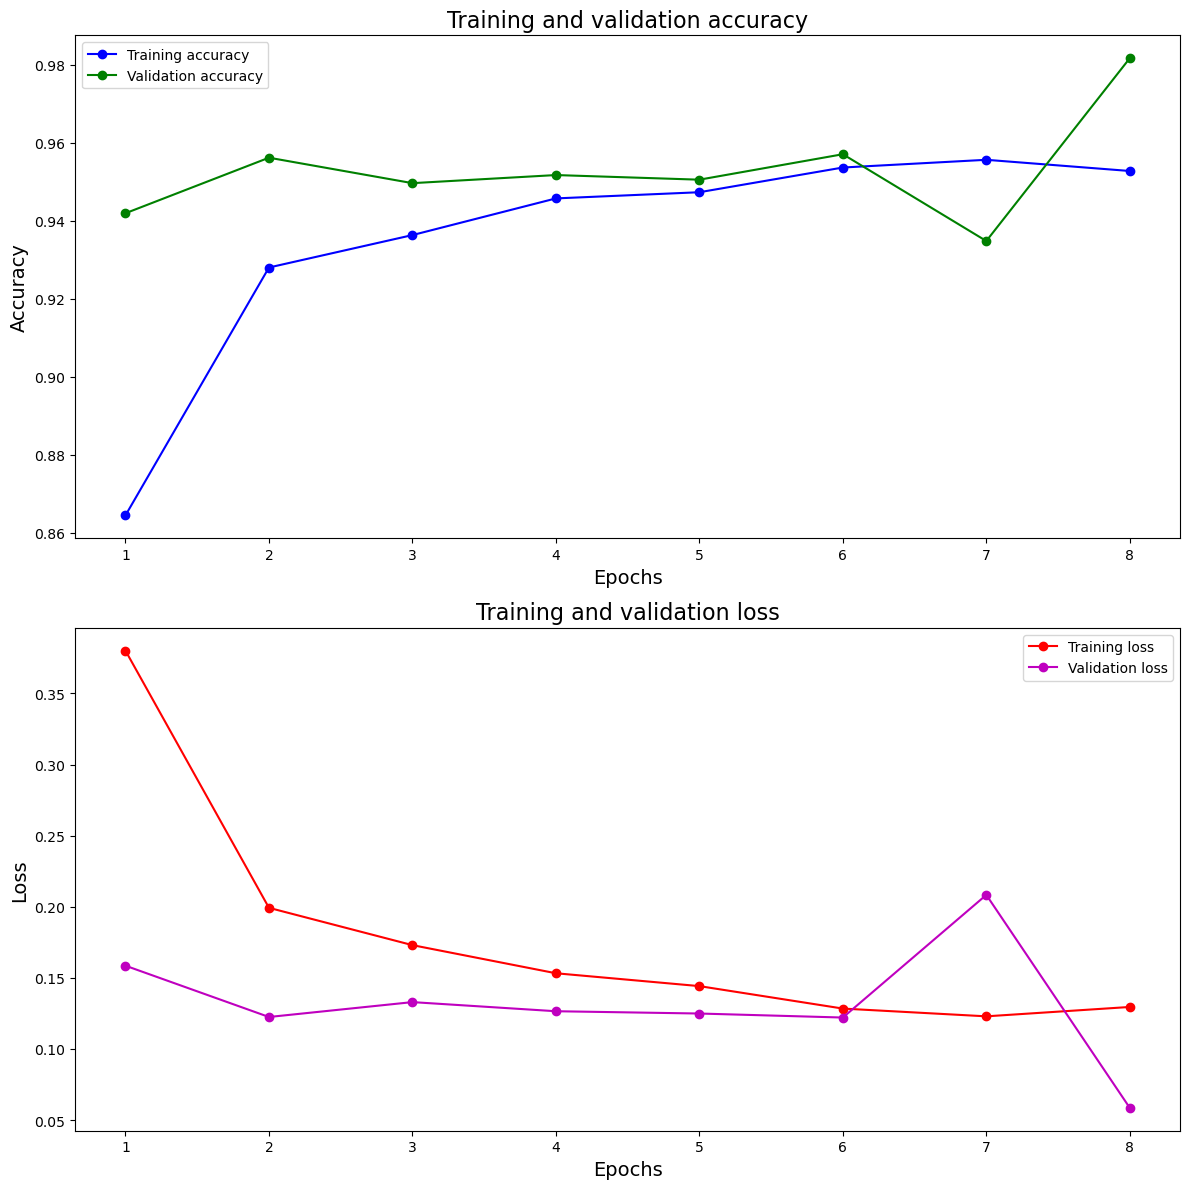

In [ ]:
# Get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Create two subplots for accuracy and loss
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot training and validation accuracy per epoch
ax1.plot(epochs, acc, 'bo-', label='Training accuracy')
ax1.plot(epochs, val_acc, 'go-', label='Validation accuracy')
ax1.set_title('Training and validation accuracy', fontsize=16)
ax1.set_xlabel('Epochs', fontsize=14)
ax1.set_ylabel('Accuracy', fontsize=14)
ax1.legend()

# Plot training and validation loss per epoch
ax2.plot(epochs, loss, 'ro-', label='Training loss')
ax2.plot(epochs, val_loss, 'mo-', label='Validation loss')
ax2.set_title('Training and validation loss', fontsize=16)
ax2.set_xlabel('Epochs', fontsize=14)
ax2.set_ylabel('Loss', fontsize=14)
ax2.legend()

plt.tight_layout()
plt.show()

Found 5493 images belonging to 6 classes.
5493/5493 [==============================] - 354s 64ms/step

Classification Report:
              precision    recall  f1-score   support

  FreshApple       0.89      0.94      0.91       774
 FreshBanana       1.00      0.98      0.99       832
 FreshOrange       0.88      0.86      0.87       924
 RottenApple       0.91      0.96      0.93      1114
RottenBanana       0.99      1.00      0.99      1059
RottenOrange       0.88      0.80      0.84       790

    accuracy                           0.93      5493
   macro avg       0.92      0.92      0.92      5493
weighted avg       0.93      0.93      0.93      5493



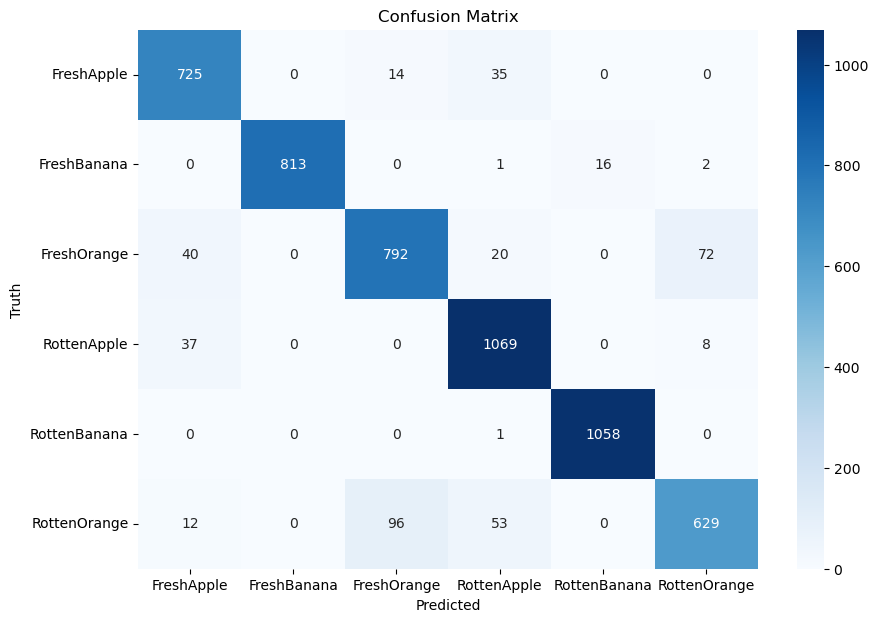

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Initialize the ImageDataGenerator with rescale
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the test directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    shuffle=False,
    class_mode='categorical'
)

# Get the true labels
y_true = test_generator.classes

# Predict labels
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

# Define the class names
class_names = ['FreshApple', 'FreshBanana', 'FreshOrange', 'RottenApple', 'RottenBanana', 'RottenOrange']

# Generate and print the classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("\nClassification Report:")
print(report)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
# Continue training the model
history = model.fit(
    train_generator,
    steps_per_epoch=(train_len/32),
    epochs=12,
    verbose=1,
    callbacks=[callbacks, early_stopping],
    validation_data=validation_generator,
    validation_steps=(val_len/32),
    initial_epoch=8
)

Epoch 9/12
315/315 [==============================] - 363s 1s/step - loss: 0.1112 - accuracy: 0.9618 - val_loss: 0.0881 - val_accuracy: 0.9683
Epoch 10/12
315/315 [==============================] - 371s 1s/step - loss: 0.1107 - accuracy: 0.9606 - val_loss: 0.0621 - val_accuracy: 0.9766
Epoch 11/12
315/315 [==============================] - 336s 1s/step - loss: 0.1104 - accuracy: 0.9642 - val_loss: 0.0713 - val_accuracy: 0.9766
Epoch 12/12
315/315 [==============================] - 337s 1s/step - loss: 0.1147 - accuracy: 0.9600 - val_loss: 0.0631 - val_accuracy: 0.9784


In [ ]:
# Continue training the model
history = model.fit(
    train_generator,
    steps_per_epoch=(train_len/32),
    epochs=15,
    verbose=1,
    callbacks=[callbacks, early_stopping],
    validation_data=validation_generator,
    validation_steps=(val_len/32),
    initial_epoch=12
)

Epoch 13/15
315/315 [==============================] - 565s 2s/step - loss: 0.0979 - accuracy: 0.9650 - val_loss: 0.0530 - val_accuracy: 0.9816
Epoch 14/15
315/315 [==============================] - 617s 2s/step - loss: 0.1083 - accuracy: 0.9608 - val_loss: 0.0657 - val_accuracy: 0.9760
Epoch 15/15
315/315 [==============================] - 611s 2s/step - loss: 0.0928 - accuracy: 0.9674 - val_loss: 0.0689 - val_accuracy: 0.9742


Found 5493 images belonging to 6 classes.
5493/5493 [==============================] - 403s 73ms/step

Classification Report:
              precision    recall  f1-score   support

  FreshApple       0.90      0.94      0.92       774
 FreshBanana       0.99      0.98      0.98       832
 FreshOrange       0.86      0.88      0.87       924
 RottenApple       0.95      0.94      0.95      1114
RottenBanana       0.99      0.99      0.99      1059
RottenOrange       0.85      0.81      0.83       790

    accuracy                           0.93      5493
   macro avg       0.92      0.92      0.92      5493
weighted avg       0.93      0.93      0.93      5493



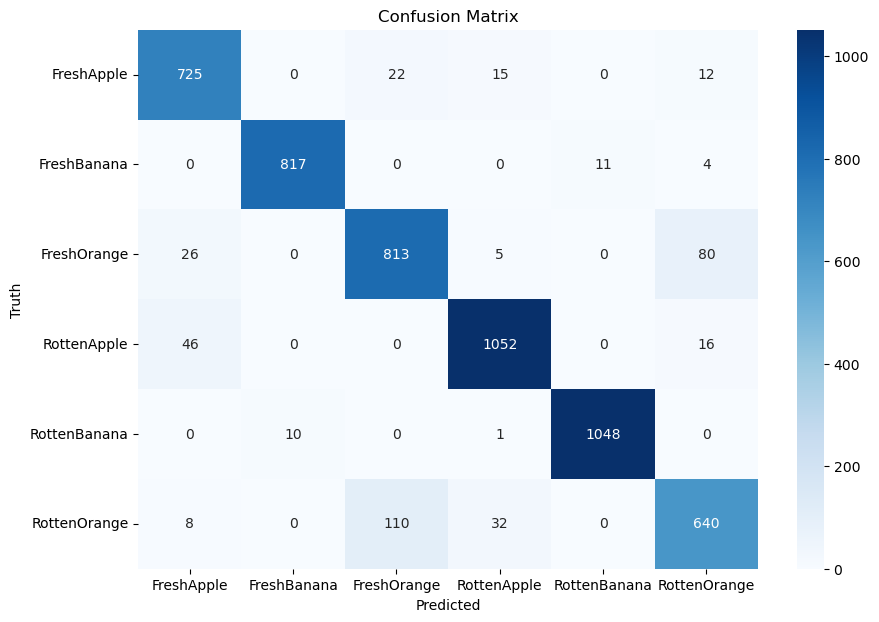

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Initialize the ImageDataGenerator with rescale
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the test directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    shuffle=False,
    class_mode='categorical'
)

# Get the true labels
y_true = test_generator.classes

# Predict labels
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

# Define the class names
class_names = ['FreshApple', 'FreshBanana', 'FreshOrange', 'RottenApple', 'RottenBanana', 'RottenOrange']

# Generate and print the classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("\nClassification Report:")
print(report)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
# Continue training the model
history = model.fit(
    train_generator,
    steps_per_epoch=(train_len/32),
    epochs=50,
    verbose=1,
    callbacks=[callbacks, early_stopping],
    validation_data=validation_generator,
    validation_steps=(val_len/32),
    initial_epoch=15
)

Epoch 16/50
315/315 [==============================] - 344s 1s/step - loss: 0.0910 - accuracy: 0.9680 - val_loss: 0.0803 - val_accuracy: 0.9689
Epoch 17/50
315/315 [==============================] - 341s 1s/step - loss: 0.0978 - accuracy: 0.9664 - val_loss: 0.0562 - val_accuracy: 0.9801
Epoch 18/50
315/315 [==============================] - 347s 1s/step - loss: 0.0911 - accuracy: 0.9703 - val_loss: 0.0601 - val_accuracy: 0.9787
Epoch 19/50
315/315 [==============================] - 338s 1s/step - loss: 0.0882 - accuracy: 0.9699 - val_loss: 0.0843 - val_accuracy: 0.9748
Epoch 20/50
315/315 [==============================] - 339s 1s/step - loss: 0.0924 - accuracy: 0.9680 - val_loss: 0.0643 - val_accuracy: 0.9760
Epoch 21/50
315/315 [==============================] - 341s 1s/step - loss: 0.0827 - accuracy: 0.9710 - val_loss: 0.0642 - val_accuracy: 0.9772
Epoch 22/50
315/315 [==============================] - 337s 1s/step - loss: 0.0883 - accuracy: 0.9697 - val_loss: 0.0542 - val_accuracy:

Found 5493 images belonging to 6 classes.
5493/5493 [==============================] - 371s 67ms/step

Classification Report:
              precision    recall  f1-score   support

  FreshApple       0.87      0.98      0.92       774
 FreshBanana       0.99      0.98      0.99       832
 FreshOrange       0.90      0.87      0.89       924
 RottenApple       0.93      0.95      0.94      1114
RottenBanana       0.99      0.99      0.99      1059
RottenOrange       0.90      0.80      0.85       790

    accuracy                           0.93      5493
   macro avg       0.93      0.93      0.93      5493
weighted avg       0.93      0.93      0.93      5493



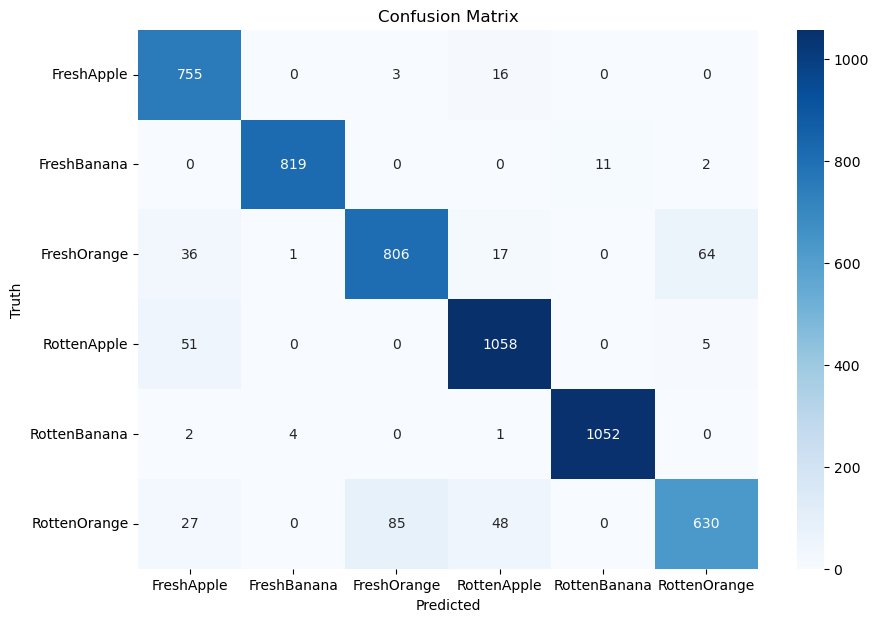

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Initialize the ImageDataGenerator with rescale
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the test directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    shuffle=False,
    class_mode='categorical'
)

# Get the true labels
y_true = test_generator.classes

# Predict labels
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

# Define the class names
class_names = ['FreshApple', 'FreshBanana', 'FreshOrange', 'RottenApple', 'RottenBanana', 'RottenOrange']

# Generate and print the classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("\nClassification Report:")
print(report)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
# Continue training the model
history = model.fit(
    train_generator,
    steps_per_epoch=(train_len/32),
    epochs=50,
    verbose=1,
    callbacks=[callbacks, early_stopping],
    validation_data=validation_generator,
    validation_steps=(val_len/32),
    initial_epoch=35
)

Epoch 36/50
315/315 [==============================] - 1320s 4s/step - loss: 0.0731 - accuracy: 0.9770 - val_loss: 0.0428 - val_accuracy: 0.9858
Epoch 37/50
315/315 [==============================] - 625s 2s/step - loss: 0.0835 - accuracy: 0.9728 - val_loss: 0.0398 - val_accuracy: 0.9858
Epoch 38/50
315/315 [==============================] - 616s 2s/step - loss: 0.0694 - accuracy: 0.9761 - val_loss: 0.0574 - val_accuracy: 0.9804
Epoch 39/50
315/315 [==============================] - 621s 2s/step - loss: 0.0639 - accuracy: 0.9768 - val_loss: 0.0487 - val_accuracy: 0.9837
Epoch 40/50
315/315 [==============================] - 622s 2s/step - loss: 0.0683 - accuracy: 0.9768 - val_loss: 0.0459 - val_accuracy: 0.9813
Epoch 41/50
315/315 [==============================] - 618s 2s/step - loss: 0.0736 - accuracy: 0.9758 - val_loss: 0.0395 - val_accuracy: 0.9870
Epoch 42/50
315/315 [==============================] - 619s 2s/step - loss: 0.0645 - accuracy: 0.9775 - val_loss: 0.0545 - val_accuracy

Found 5493 images belonging to 6 classes.
5493/5493 [==============================] - 206s 37ms/step

Classification Report:
              precision    recall  f1-score   support

  FreshApple       0.88      0.97      0.92       774
 FreshBanana       1.00      0.97      0.98       832
 FreshOrange       0.90      0.89      0.90       924
 RottenApple       0.94      0.96      0.95      1114
RottenBanana       0.98      1.00      0.99      1059
RottenOrange       0.91      0.81      0.86       790

    accuracy                           0.94      5493
   macro avg       0.94      0.93      0.93      5493
weighted avg       0.94      0.94      0.94      5493



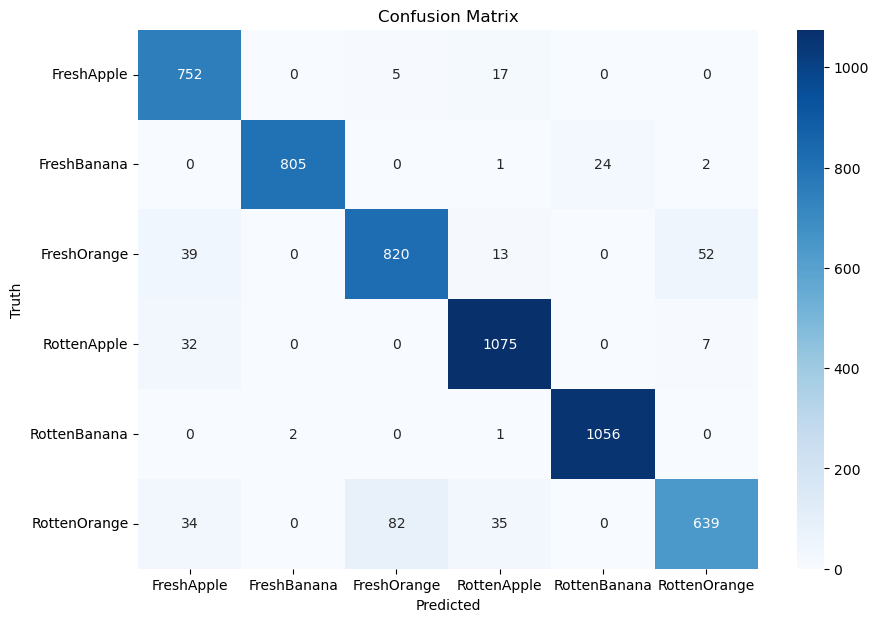

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Initialize the ImageDataGenerator with rescale
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the test directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    shuffle=False,
    class_mode='categorical'
)

# Get the true labels
y_true = test_generator.classes

# Predict labels
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

# Define the class names
class_names = ['FreshApple', 'FreshBanana', 'FreshOrange', 'RottenApple', 'RottenBanana', 'RottenOrange']

# Generate and print the classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("\nClassification Report:")
print(report)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
# Continue training the model
history = model.fit(
    train_generator,
    steps_per_epoch=(train_len/32),
    epochs=50,
    verbose=1,
    callbacks=[callbacks, early_stopping],
    validation_data=validation_generator,
    validation_steps=(val_len/32),
    initial_epoch=46
)

Epoch 47/50
315/315 [==============================] - 945s 3s/step - loss: 0.0699 - accuracy: 0.9774 - val_loss: 0.0557 - val_accuracy: 0.9810
Epoch 48/50
315/315 [==============================] - 335s 1s/step - loss: 0.0585 - accuracy: 0.9815 - val_loss: 0.0444 - val_accuracy: 0.9864
Epoch 49/50
315/315 [==============================] - 542s 2s/step - loss: 0.0690 - accuracy: 0.9792 - val_loss: 0.0384 - val_accuracy: 0.9855
Epoch 50/50
315/315 [==============================] - 614s 2s/step - loss: 0.0697 - accuracy: 0.9769 - val_loss: 0.0400 - val_accuracy: 0.9852


Found 5493 images belonging to 6 classes.
5493/5493 [==============================] - 417s 76ms/step

Classification Report:
              precision    recall  f1-score   support

  FreshApple       0.86      0.98      0.92       774
 FreshBanana       1.00      0.96      0.98       832
 FreshOrange       0.91      0.88      0.89       924
 RottenApple       0.94      0.96      0.95      1114
RottenBanana       0.97      0.99      0.98      1059
RottenOrange       0.89      0.80      0.84       790

    accuracy                           0.93      5493
   macro avg       0.93      0.93      0.93      5493
weighted avg       0.93      0.93      0.93      5493



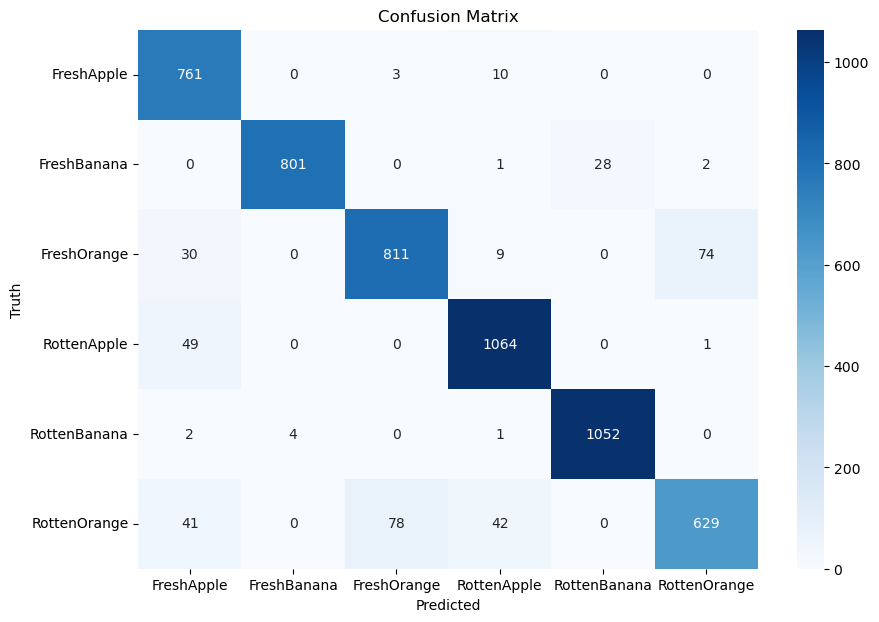

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Initialize the ImageDataGenerator with rescale
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the test directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    shuffle=False,
    class_mode='categorical'
)

# Get the true labels
y_true = test_generator.classes

# Predict labels
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

# Define the class names
class_names = ['FreshApple', 'FreshBanana', 'FreshOrange', 'RottenApple', 'RottenBanana', 'RottenOrange']

# Generate and print the classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("\nClassification Report:")
print(report)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
# Continue training the model
history = model.fit(
    train_generator,
    steps_per_epoch=(train_len/32),
    epochs=51,
    verbose=1,
    callbacks=[callbacks, early_stopping],
    validation_data=validation_generator,
    validation_steps=(val_len/32),
    initial_epoch=50
)

Epoch 51/51
315/315 [==============================] - 629s 2s/step - loss: 0.0587 - accuracy: 0.9819 - val_loss: 0.0337 - val_accuracy: 0.9881


Found 5493 images belonging to 6 classes.
5493/5493 [==============================] - 386s 70ms/step

Classification Report:
              precision    recall  f1-score   support

  FreshApple       0.89      0.98      0.94       774
 FreshBanana       0.99      0.98      0.98       832
 FreshOrange       0.91      0.90      0.90       924
 RottenApple       0.94      0.97      0.96      1114
RottenBanana       0.98      0.99      0.99      1059
RottenOrange       0.92      0.79      0.85       790

    accuracy                           0.94      5493
   macro avg       0.94      0.94      0.94      5493
weighted avg       0.94      0.94      0.94      5493



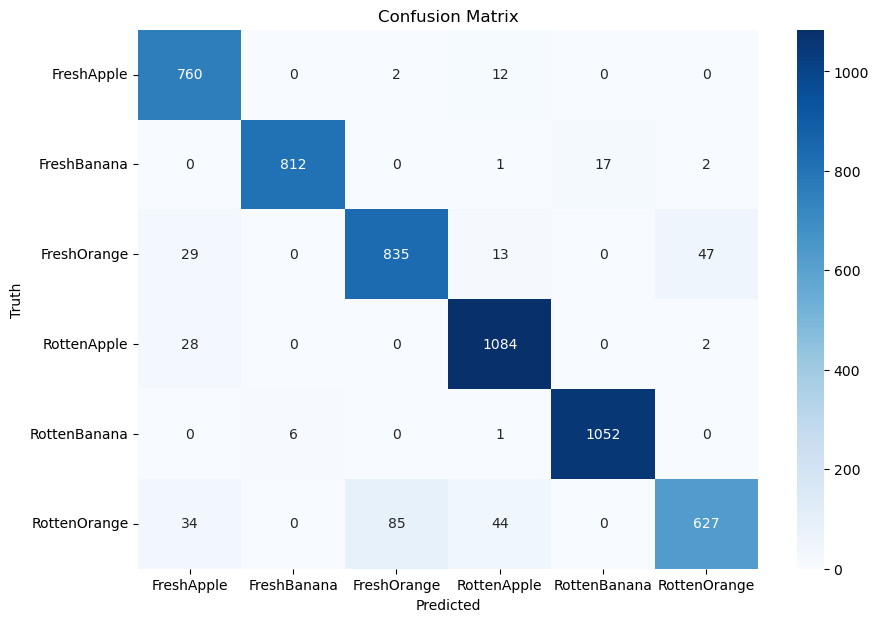

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Initialize the ImageDataGenerator with rescale
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the test directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    shuffle=False,
    class_mode='categorical'
)

# Get the true labels
y_true = test_generator.classes

# Predict labels
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

# Define the class names
class_names = ['FreshApple', 'FreshBanana', 'FreshOrange', 'RottenApple', 'RottenBanana', 'RottenOrange']

# Generate and print the classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("\nClassification Report:")
print(report)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
model.save(r'C:\Users\Fateh\Desktop\Project/Fruits_Model(12).keras')

1/1 [==============================] - 0s 94ms/step


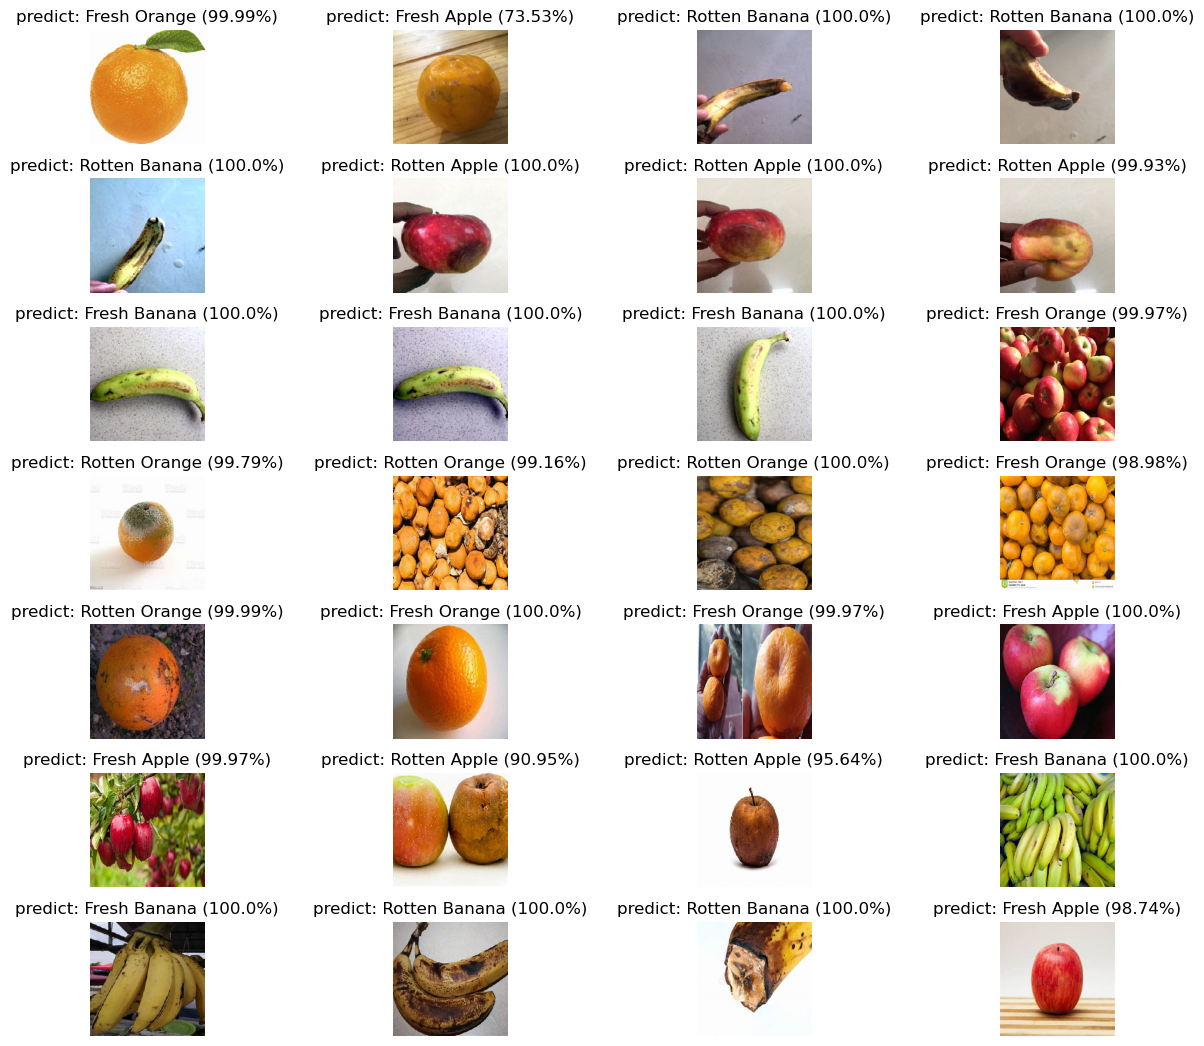

In [ ]:
# Load your trained model
model_predict = tf.keras.models.load_model(r'C:\Users\Fateh\Desktop\Project/Fruits_Model(12).keras')
model_predict.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Specify the folder path here
folder_path = 'D:\Project Dataset\Processed Images_Fruits/Mix'
image_names = os.listdir(folder_path)

image_conf = []
predict_result = []

for image_name in image_names:
    img_path = os.path.join(folder_path, image_name)
    img = image.load_img(img_path, color_mode="rgb", target_size=(224, 224), interpolation="nearest")
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img/255

    classes = model_predict.predict(img, batch_size=10)

    max_confidence = np.amax(classes[0])
    prediction_index = np.where(classes[0] == max_confidence)[0][0]

    predictions = ['Fresh Apple', 'Fresh Banana', 'Fresh Orange', 'Rotten Apple', 'Rotten Banana', 'Rotten Orange']

    image_conf.append(max_confidence)
    predict_result.append(predictions[prediction_index])

plt.figure(figsize=(15, 15))
for n in range(len(image_names)):
  plt.subplot((len(image_names)//4)+1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(os.path.join(folder_path, image_names[n]), color_mode="rgb", target_size=(224, 224), interpolation="nearest"))
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"
  plt.title(title, color='black')
  plt.axis('off')
plt.show()

In [ ]:
# Continue training the model
history = model.fit(
    train_generator,
    steps_per_epoch=(train_len/32),
    epochs=55,
    verbose=1,
    callbacks=[callbacks, early_stopping],
    validation_data=validation_generator,
    validation_steps=(val_len/32),
    initial_epoch=51
)

Epoch 52/55
315/315 [==============================] - 668s 2s/step - loss: 0.0608 - accuracy: 0.9808 - val_loss: 0.0433 - val_accuracy: 0.9852
Epoch 53/55
315/315 [==============================] - 964s 3s/step - loss: 0.0620 - accuracy: 0.9793 - val_loss: 0.0455 - val_accuracy: 0.9861
Epoch 54/55
315/315 [==============================] - 621s 2s/step - loss: 0.0684 - accuracy: 0.9785 - val_loss: 0.0521 - val_accuracy: 0.9822
Epoch 55/55
315/315 [==============================] - 603s 2s/step - loss: 0.0575 - accuracy: 0.9808 - val_loss: 0.0370 - val_accuracy: 0.9867


Found 5493 images belonging to 6 classes.
5493/5493 [==============================] - 412s 75ms/step

Classification Report:
              precision    recall  f1-score   support

  FreshApple       0.88      0.99      0.93       774
 FreshBanana       1.00      0.98      0.99       832
 FreshOrange       0.91      0.87      0.89       924
 RottenApple       0.95      0.96      0.96      1114
RottenBanana       0.99      1.00      0.99      1059
RottenOrange       0.88      0.80      0.84       790

    accuracy                           0.94      5493
   macro avg       0.93      0.93      0.93      5493
weighted avg       0.94      0.94      0.94      5493



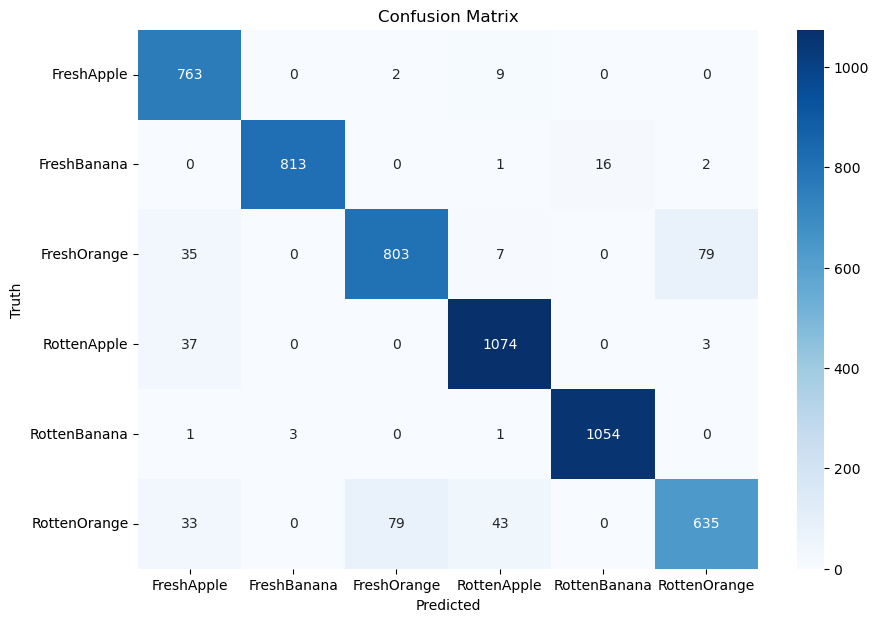

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Initialize the ImageDataGenerator with rescale
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the test directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    shuffle=False,
    class_mode='categorical'
)

# Get the true labels
y_true = test_generator.classes

# Predict labels
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

# Define the class names
class_names = ['FreshApple', 'FreshBanana', 'FreshOrange', 'RottenApple', 'RottenBanana', 'RottenOrange']

# Generate and print the classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("\nClassification Report:")
print(report)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
model.save(r'C:\Users\Fateh\Desktop\Project/Fruits_Model(12.1).keras')

1/1 [==============================] - 0s 94ms/step


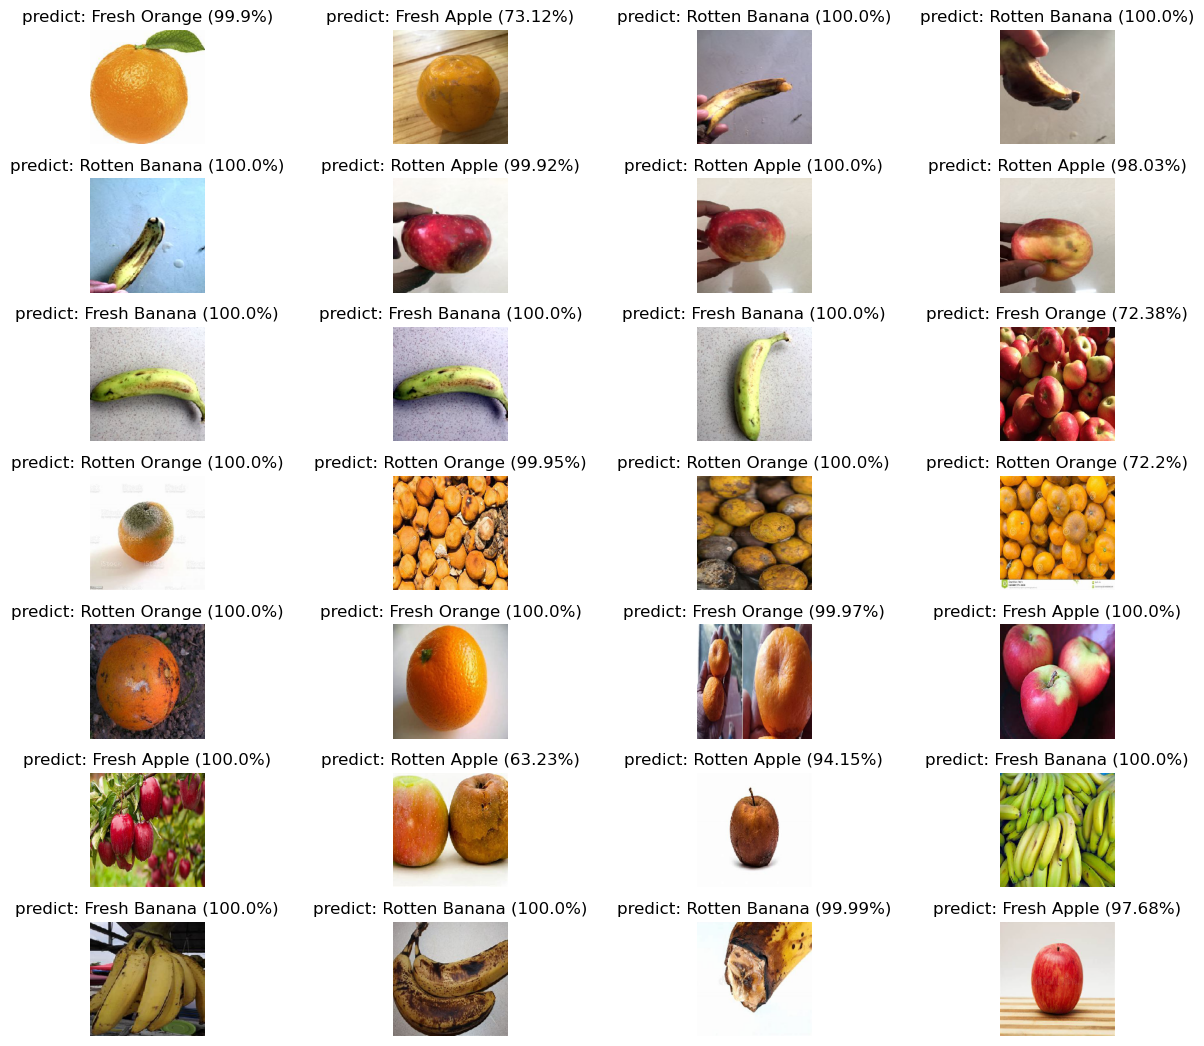

In [ ]:
# Load your trained model
model_predict = tf.keras.models.load_model(r'C:\Users\Fateh\Desktop\Project/Fruits_Model(12.1).keras')
model_predict.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Specify the folder path here
folder_path = 'D:\Project Dataset\Processed Images_Fruits/Mix'
image_names = os.listdir(folder_path)

image_conf = []
predict_result = []

for image_name in image_names:
    img_path = os.path.join(folder_path, image_name)
    img = image.load_img(img_path, color_mode="rgb", target_size=(224, 224), interpolation="nearest")
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img/255

    classes = model_predict.predict(img, batch_size=10)

    max_confidence = np.amax(classes[0])
    prediction_index = np.where(classes[0] == max_confidence)[0][0]

    predictions = ['Fresh Apple', 'Fresh Banana', 'Fresh Orange', 'Rotten Apple', 'Rotten Banana', 'Rotten Orange']

    image_conf.append(max_confidence)
    predict_result.append(predictions[prediction_index])

plt.figure(figsize=(15, 15))
for n in range(len(image_names)):
  plt.subplot((len(image_names)//4)+1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(os.path.join(folder_path, image_names[n]), color_mode="rgb", target_size=(224, 224), interpolation="nearest"))
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"
  plt.title(title, color='black')
  plt.axis('off')
plt.show()